In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np

### ANALISIS DISCRIMINANTE LINEAL

### Lineal 
- Se usa en un conjunto de datos con diferentes categorías ()
- Intenta encontrar las combinaciones lineales de las características que mejor separan estas categorías 
    - En este caso las características son la longitud del sépalo y pétalo 
- Encuentra las direcciones que maximizan la separación (distancia entre las medias) entre clases y minimiza la varianza dentro de cada clase 
    - Maximiza distancia: Las flores Setosa tienen una media de longitud del sépalo y del pétalo más pequeña en comparación con las flores Virginica. LDA buscará una dirección que maximice la diferencia entre esas medias.
    - Minimiza varianza: En el caso de las flores Setosa, todas tienen longitudes del sépalo y del pétalo similares, por lo que la dispersión dentro de esta clase es pequeña. LDA buscará que esta clase esté bien agrupada en la nueva dimensión, mientras que las flores de las otras clases estarán separadas.
- Es útil para la reducción de dimensionalidad cuando tienes muchas características y es más efectivo cuando el número de muestras es mucho mayor que el número de características.

In [2]:
# 1.Cargar los datos
iris = load_iris()
X = iris.data # longitud sépalo y pétalo 
y = iris.target #'setosa' 'versicolor' 'virginica'

#### Entrenar modelo 

In [3]:
# 2.Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
print("Shape datos entrenamiento", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 3.Estandarizacion
norm_X = preprocessing.StandardScaler()
X_train = norm_X.fit_transform(X_train)
X_test = norm_X.transform(X_test)

# 4.Crear y entrenar el modelo LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
#print("X_train", X_train, "X_test",X_test)

Shape datos entrenamiento (105, 4) (45, 4) (105,) (45,)


#### Predicciones y evaluar modelo 

In [12]:
# 5.Ajuste de regresion logistica en el conjunto de entrenamiento
clasificador = LogisticRegression(random_state=0)
clasificador.fit(X_train,y_train)

# 6.Predecir
y_pre = clasificador.predict(X_test) # predice sobre los datos de prueba 
print("Respuesta Modelo:", y_pre)
print("Valores de los Datos:", y_test)

y_pred = clasificador.predict(X_test)
print("Accuracy Linear:", accuracy_score(y_test, y_pred))

Respuesta Modelo: [2 1 0 2 2 1 1 1 2 2 2 2 0 2 1 1 2 0 0 1 1 2 0 1 2 1 1 2 0 1 1 1 0 1 1 2 0
 1 1 0 1 2 0 1 2]
Valores de los Datos: [2 1 0 2 2 2 1 1 2 2 2 2 0 2 1 1 1 0 0 1 1 2 0 1 2 1 1 2 0 1 1 1 0 1 1 2 0
 1 1 0 1 2 0 1 2]
Accuracy Linear: 0.9555555555555556


#### Matriz de confusión 

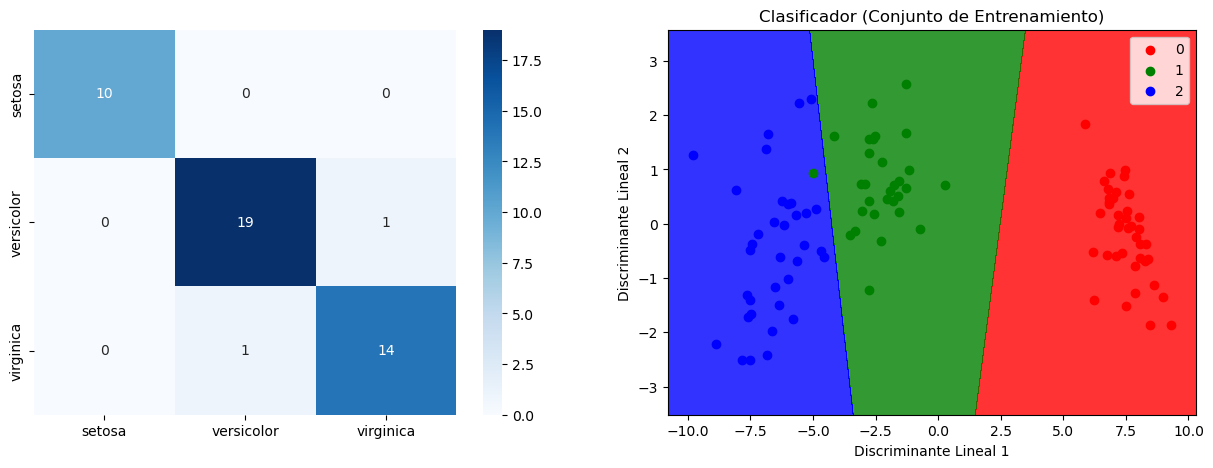

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

confmat = confusion_matrix(y_test, y_pre)
sns.heatmap(confmat, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[0])

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.8, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Discriminante Lineal 1')
plt.ylabel('Discriminante Lineal 2')
plt.legend()
plt.show()

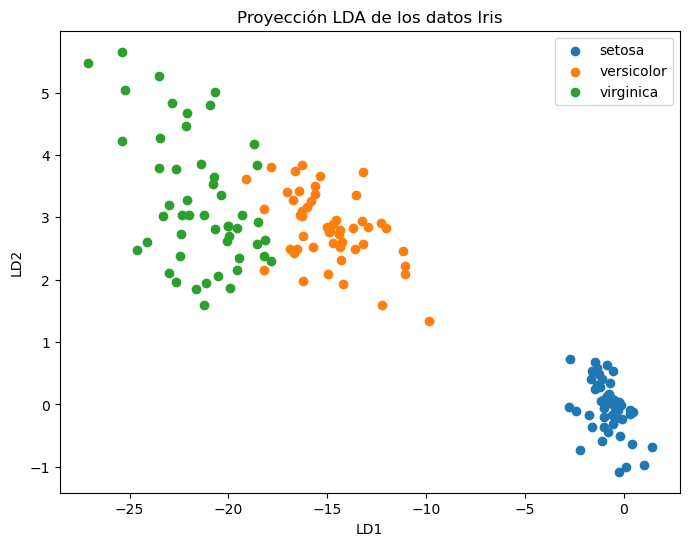

In [6]:
X_lda = lda.transform(X)  # Proyección de los datos originales en el espacio LDA 
# que esta buscando los componentes que maximicen la separación entre las clases del conjunto de datos 
# es supervisado por lo que usa las etiquetas 
#  
plt.figure(figsize=(8, 6))
# Graficamos los puntos proyectados en 2D
for i, target in enumerate(iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1] if X_lda.shape[1] > 1 else [0]*sum(y == i), label=target)
plt.xlabel("LD1")  # Primer componente discriminante
if X_lda.shape[1] > 1:
    plt.ylabel("LD2")  # Segundo componente discriminante
plt.legend()
plt.title("Proyección LDA de los datos Iris")
plt.show()

### ANALISIS DISCRIMINANTE CUADRATICO

* Se usa en un conjunto de datos con diferentes categorías (por ejemplo, tipos de flores).
* Intenta encontrar fronteras de decisión curvas (cuadráticas) que separen de manera óptima estas categorías.
* En este caso, las características son la longitud del sépalo y del pétalo.
* A diferencia del análisis discriminante lineal (LDA), QDA permite que cada clase tenga su propia covarianza, lo que significa que no asume que todas las clases tienen la misma forma ni la misma dispersión.
* Esto permite que el modelo sea más flexible y se adapte mejor cuando las clases tienen formas y distribuciones diferentes.
* Es útil cuando las clases no tienen la misma forma o tamaño en el espacio de características.
* Funciona mejor cuando se tiene una cantidad suficiente de datos, ya que modelar una matriz de covarianza distinta por clase requiere más parámetros.

In [7]:
X1 = iris.data #Extrae las características del dataset Iris
y1 = iris.target #Extrae las etiquetas de clase

In [8]:
from sklearn.preprocessing import StandardScaler

# 1. Normalizacion de Datos
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

from sklearn.decomposition import PCA
#Aplica PCA a los datos y los reduce a 2 dimensiones. La función fit_transform() ajusta
#el modelo PCA a los datos (fit) y transforma los datos originales en el nuevo espacio reducido (transform).
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1_scaled)

#Divide los datos en conjuntos de entrenamiento y prueba. Se asigna el 70% de los datos a entrenamiento (X_train,
#y_train) y el 30% a prueba (X1_test, y1_test). El parámetro random_state=None implica que será diferente cada vez que 
#se ejecute el código (no reproducible).
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=None)

Aquí se crea un objeto qda, que es una instancia del modelo QDA. Todavía no ha aprendido nada; simplemente se está configurando el modelo.

**QuadraticDiscriminantAnalysis() crea un modelo de clasificación que:**

* Asume que cada clase tiene una distribución normal multivariada (Gaussiana).
* Permite que cada clase tenga su propia matriz de covarianza, a diferencia del Análisis Discriminante Lineal (LDA), que asume que todas las clases comparten la misma matriz de covarianza.

De esta manera, QDA puede modelar fronteras de decisión curvas, en lugar de lineales como en LDA.

In [9]:
qda = QuadraticDiscriminantAnalysis()
X_qda = qda.fit(X1_train, y1_train)
#Entrena el modelo QDA usando los datos de entrenamiento (X1_train, y1_train).
#El modelo ajusta sus parámetros para aprender las características de las clases y cómo diferenciarlas.

y_predic = qda.predict(X1_test)
#Hace predicciones sobre los datos de prueba (X1_test). El modelo QDA predice las clases
#de las muestras en el conjunto de prueba.

print("Respuesta Modelo:", y_predic)
print("Valores de los Datos:", y1_test)
print("Accuracy Quadratic):", accuracy_score(y1_test, y_predic))
#Calcula y muestra la exactitud del modelo comparando las etiquetas verdaderas del conjunto
#de prueba (y_test1) con las predicciones del modelo (y_predic). La función accuracy_score()
#calcula la proporción de aciertos (predicciones correctas).

Respuesta Modelo: [0 1 2 1 0 2 0 2 2 0 0 0 1 1 0 1 2 0 0 2 0 0 0 2 0 2 0 2 0 2 2 0 1 1 1 0 2
 2 0 0 0 2 0 2 1]
Valores de los Datos: [0 1 2 1 0 2 0 2 2 0 0 0 1 1 0 1 2 0 0 2 0 0 0 2 0 2 0 2 0 2 2 0 1 1 1 0 2
 2 0 0 0 1 0 2 1]
Accuracy Quadratic): 0.9777777777777777


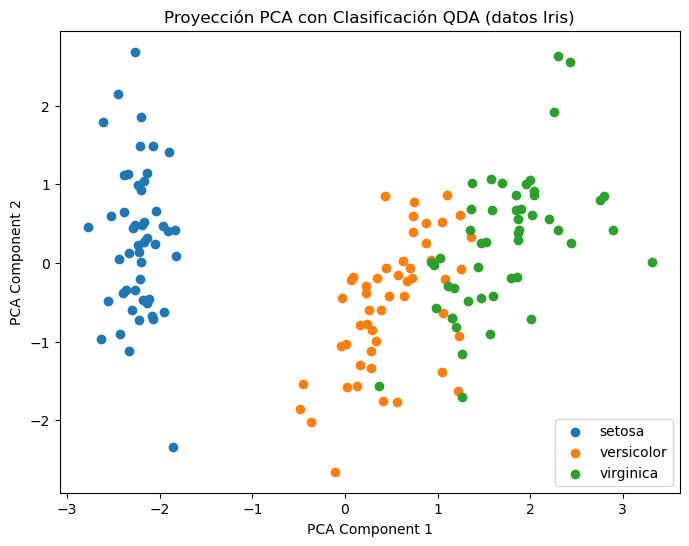

Matriz de Confusión:
 [[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


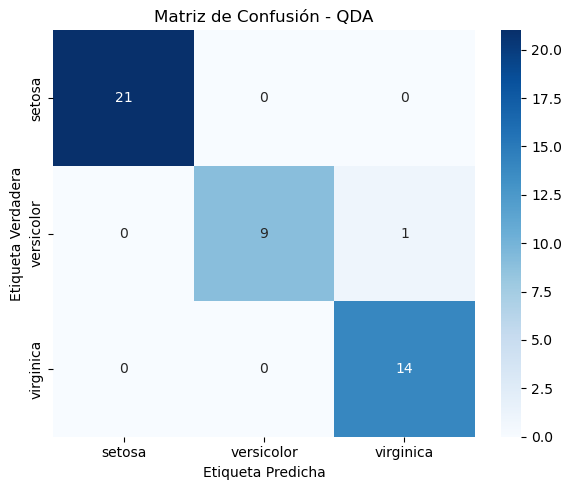

In [10]:
plt.figure(figsize=(8, 6))
for i, target in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.title("Proyección PCA con Clasificación QDA (datos Iris)")
plt.show()

# Matriz de confusión
conf_matrix = confusion_matrix(y1_test, y_predic)
print("Matriz de Confusión:\n", conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.title("Matriz de Confusión - QDA")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.tight_layout()
plt.show()

Visualización de la proyección de los datos de iris en un espacio de 2 dimensiones.

* Ejes X e Y: corresponden a las dos componentes principales obtenidas mediante PCA, que son las direcciones de mayor varianza en los datos originales. En otras palabras, las componentes que mejor explican las diferencias entre las flores en el conjunto de datos.

* Colores de los puntos: Cada punto en el gráfico representa una flor, y los colores de los puntos indican la especie de cada flor.

Este gráfico permite visualizar cómo se separan o agrupan las especies según las dos principales características que capturan la mayor parte de la varianza en los datos originales.

#### Cuando usar lineal vs cuadrático 
- LDA: Supón que estás clasificando tipos de flores y los datos de cada tipo de flor tienen distribuciones de características similares (por ejemplo, las flores de la misma especie tienen características similares de tamaño y forma de pétalos). En este caso, LDA es una buena opción porque las clases tienen distribuciones similares.
- QDA: Imagina que estás clasificando tipos de frutas, donde las clases tienen distribuciones de características muy diferentes (por ejemplo, una clase de manzanas con mucha variabilidad en tamaño y color, y una clase de naranjas con características más consistentes). En este caso, QDA podría ser más apropiado, ya que puede modelar mejor esas diferencias en la varianza de las clases.

- LDA cuando 
    - las clases tienen varianza similares 
    - número limitado de datos (LDA tiende a ser más robusto en escenarios con datos pequeños)

- QDA cuando 
    - las clases tienen diferentes varianzas y dispersión (las distribuciones de clase no son homogéneas)
    - tienes suficientes datos para justificar un modelo más complejo y no te importa que el modelo sea más propenso al sobreajuste
    - quieres un modelo más flexible capaz de modelar fronteras de decisión no lineales